# Data Pre-Processing Assignment

### Brayan Gutierrez, Katie To, Jericka Ledezma
***

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Reading Data

In [3]:
ground_water = pd.read_csv("ground_water_quality_2022_post.csv")
ground_water_df = pd.DataFrame(ground_water)
ground_water_df = ground_water_df.dropna()
print(ground_water_df)

      sno  district       mandal      village  lat_gis  long_gis  RL_GIS  \
0       1  ADILABAD     Adilabad     Adilabad    78.52     19.67   253.0   
1       2  ADILABAD  Bazarhatnur  Bazarhatnur    78.35     19.46   435.0   
2       3  ADILABAD         Bela   Chandpally    78.85     19.68   247.0   
3       4  ADILABAD     Bheempur         Arli    78.38     19.83   224.0   
4       5  ADILABAD     Bheempur     Bheempur    78.42     19.77   245.0   
...   ...       ...          ...          ...      ...       ...     ...   
1019   31   YADADRI    Valigonda   T. somaram    78.95     17.40   339.0   
1020   32   YADADRI    Valigonda  Varkatpally    78.93     17.34   339.0   
1021   33   YADADRI    Valigonda  Vemulakonda    79.14     17.35   265.0   
1022   34   YADADRI      Y.Gutta   Mallapuram    78.91     17.63   439.0   
1023   35   YADADRI      Y.Gutta   Motakondur    79.03     17.55   342.0   

                 season    pH     E.C  ...    SO4     Na     K     Ca    Mg  \
0     Po

## Data Cleaning
***

In [4]:
ground_water_df['pH'] = pd.to_numeric(ground_water_df['pH'], errors='coerce')
ground_water_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               817 non-null    int64  
 1   district          817 non-null    object 
 2   mandal            817 non-null    object 
 3   village           817 non-null    object 
 4   lat_gis           817 non-null    float64
 5   long_gis          817 non-null    float64
 6   RL_GIS            817 non-null    float64
 7   season            817 non-null    object 
 8   pH                817 non-null    float64
 9   E.C               817 non-null    float64
 10  TDS               817 non-null    float64
 11  CO3               817 non-null    float64
 12  HCO3              817 non-null    float64
 13  Cl                817 non-null    float64
 14  F                 817 non-null    float64
 15  NO3               817 non-null    float64
 16  SO4               817 non-null    float64
 17  N

### Separating Numeric and Non-numeric Columns

In [5]:
ground_water_df = ground_water_df.rename(columns = {'NO3 ': 'NO3'})
ground_water_df = ground_water_df.rename(columns = {'RSC  meq  / L': 'RSC'})
numeric = ground_water_df.select_dtypes(include=['number']).columns
nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

print(numeric)
print(nonnumeric)

Index(['sno', 'lat_gis', 'long_gis', 'RL_GIS', 'pH', 'E.C', 'TDS', 'CO3',
       'HCO3', 'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'RSC'],
      dtype='object')
Index(['district', 'mandal', 'village', 'season', 'Classification',
       'Classification.1'],
      dtype='object')


### Finding Missing Data

In [6]:
ground_water_df[nonnumeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   district          817 non-null    object
 1   mandal            817 non-null    object
 2   village           817 non-null    object
 3   season            817 non-null    object
 4   Classification    817 non-null    object
 5   Classification.1  817 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [7]:
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       817 non-null    int64  
 1   lat_gis   817 non-null    float64
 2   long_gis  817 non-null    float64
 3   RL_GIS    817 non-null    float64
 4   pH        817 non-null    float64
 5   E.C       817 non-null    float64
 6   TDS       817 non-null    float64
 7   CO3       817 non-null    float64
 8   HCO3      817 non-null    float64
 9   Cl        817 non-null    float64
 10  F         817 non-null    float64
 11  NO3       817 non-null    float64
 12  SO4       817 non-null    float64
 13  Na        817 non-null    float64
 14  K         817 non-null    float64
 15  Ca        817 non-null    float64
 16  Mg        817 non-null    float64
 17  T.H       817 non-null    float64
 18  SAR       817 non-null    float64
 19  RSC       817 non-null    float64
dtypes: float64(19), int64(1)
memory usag

### No missing data!!

## Outlier Detection

### We will be using histograms and boxplots for each numeric variable to determine any possible outliers:

#### Serial Number (sno)

<Axes: >

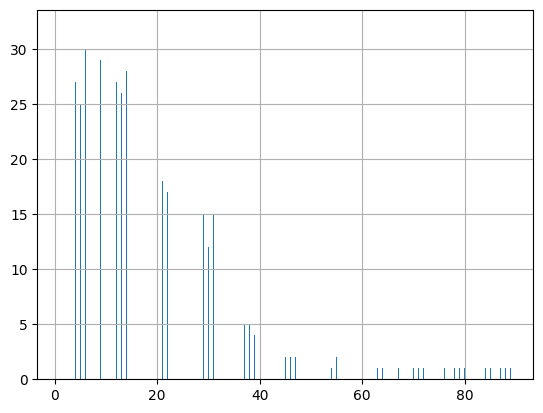

In [8]:
ground_water_df['sno'].hist(bins = 1000)

<Axes: >

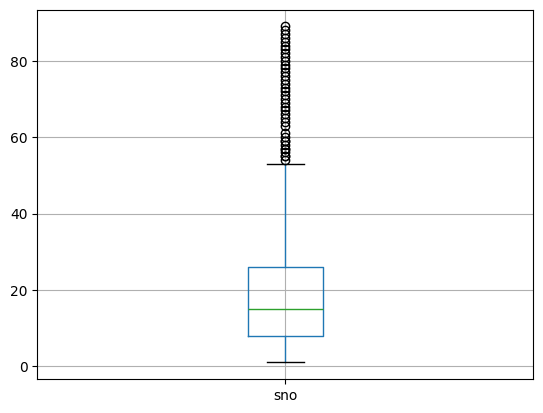

In [9]:
ground_water_df.boxplot(column=['sno'])

#### Lattitude (lat_gis)

<Axes: >

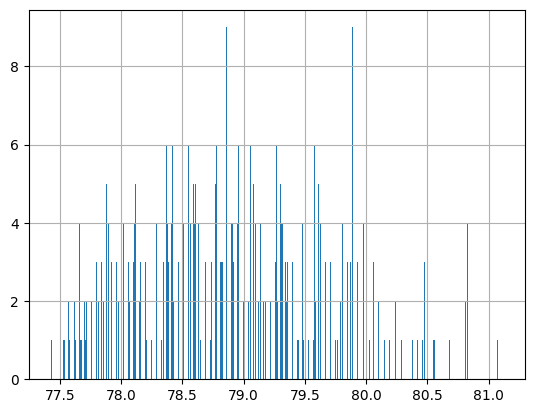

In [10]:
ground_water_df['lat_gis'].hist(bins = 1000)

<Axes: >

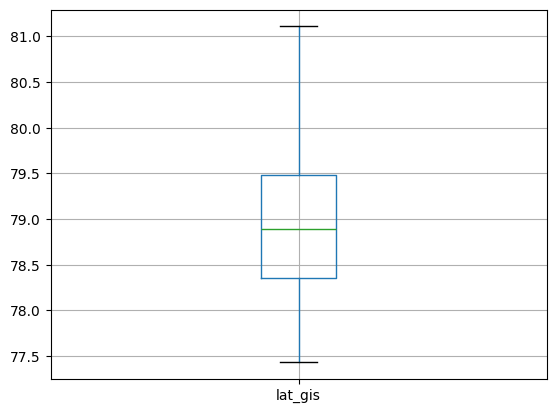

In [11]:
ground_water_df.boxplot(column=['lat_gis'])

#### Longitude (long_gis)

<Axes: >

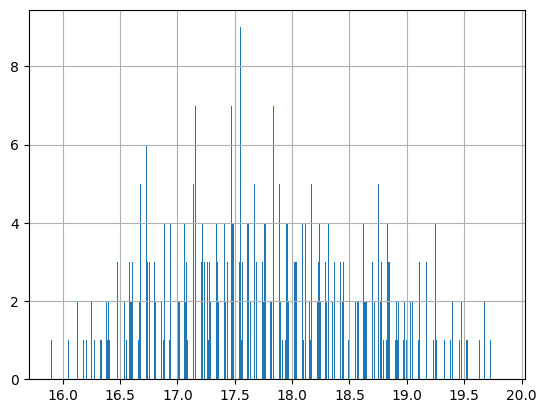

In [12]:
ground_water_df['long_gis'].hist(bins = 1000)

<Axes: >

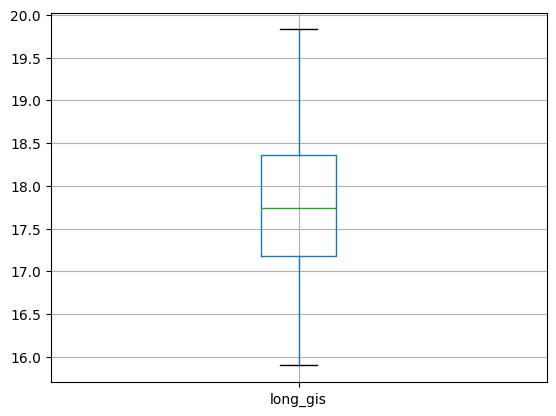

In [13]:
ground_water_df.boxplot(column=['long_gis'])

#### Ground Water Level (gwl)

<Axes: >

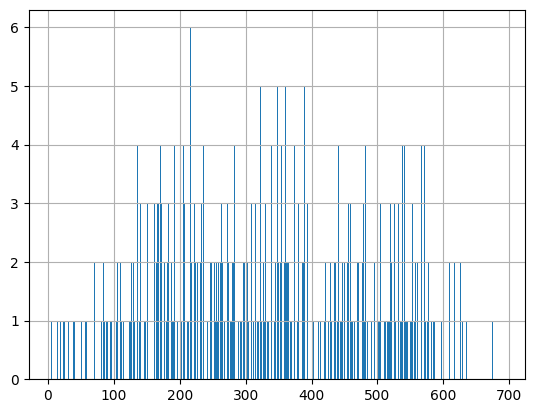

In [14]:
ground_water_df['RL_GIS'].hist(bins = 1000)

<Axes: >

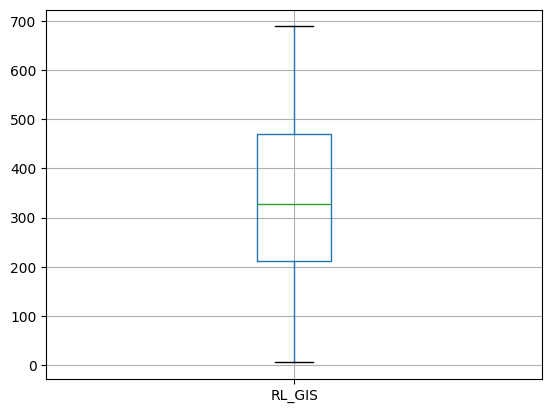

In [15]:
ground_water_df.boxplot(column=['RL_GIS'])

#### pH

<Axes: >

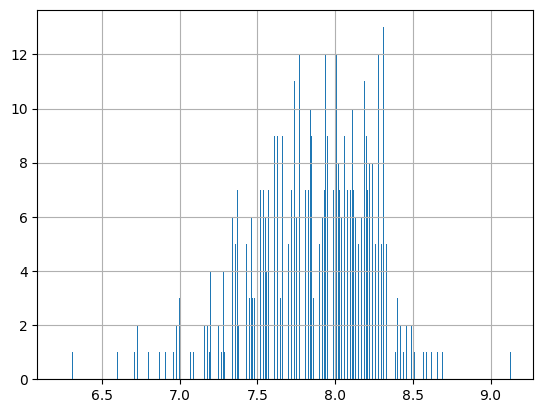

In [16]:
ground_water_df['pH'].hist(bins = 1000)

<Axes: >

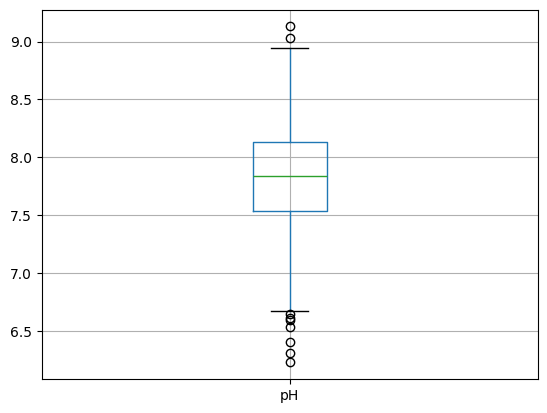

In [17]:
ground_water_df.boxplot(column=['pH'])

#### Electrical Conductivity (E.C)

<Axes: >

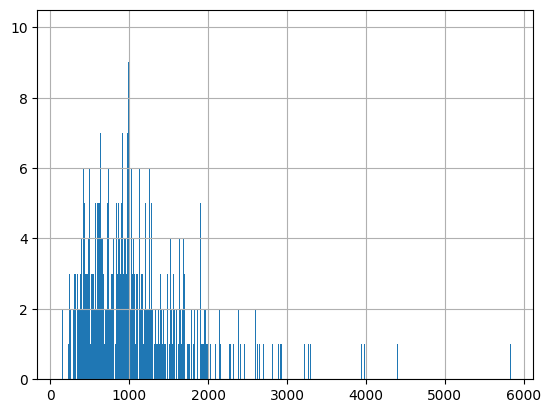

In [18]:
ground_water_df['E.C'].hist(bins = 1000)

<Axes: >

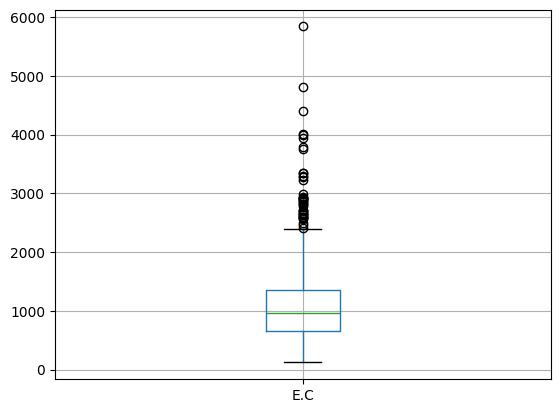

In [19]:
ground_water_df.boxplot(column=['E.C'])

#### Total Dissolved Solids (TDS)

<Axes: >

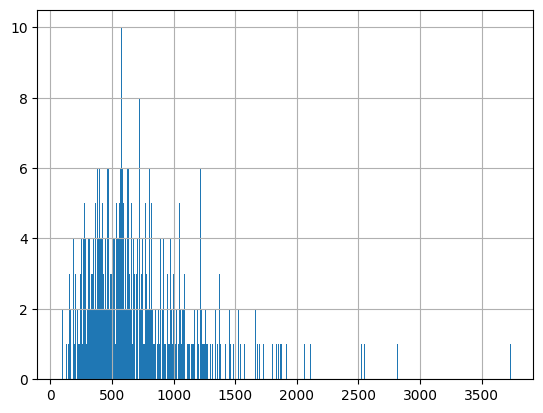

In [20]:
ground_water_df['TDS'].hist(bins = 1000)

<Axes: >

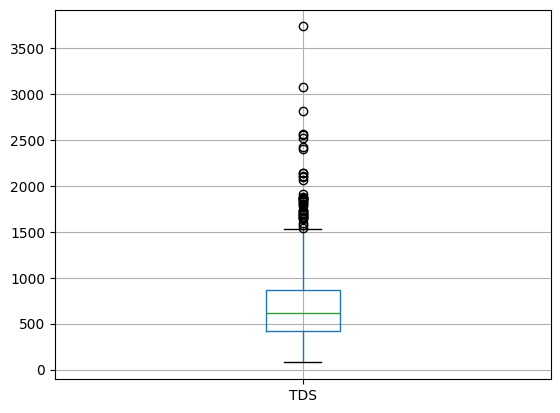

In [21]:
ground_water_df.boxplot(column=['TDS'])

#### Carbonate Present (CO3)

<Axes: >

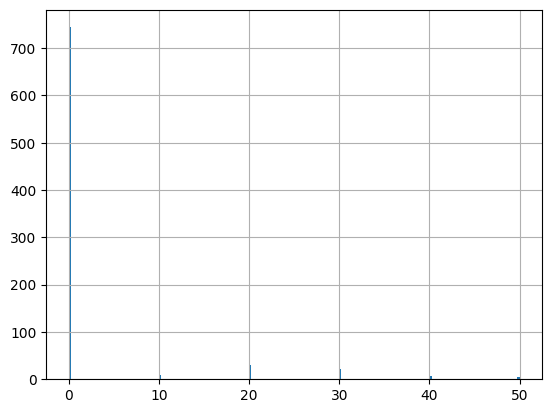

In [22]:
ground_water_df['CO3'].hist(bins = 200)

<Axes: >

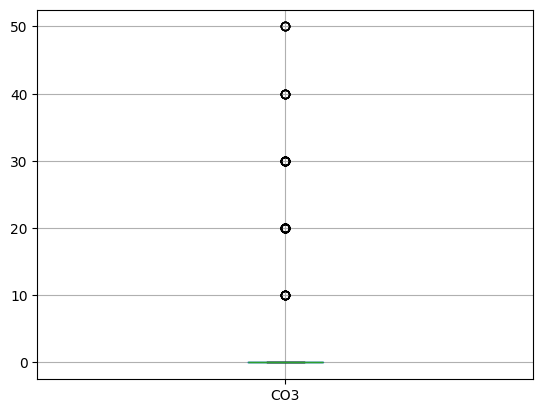

In [23]:
ground_water_df.boxplot(column=['CO3'])

#### Bicarbonate Present (HCO3)

<Axes: >

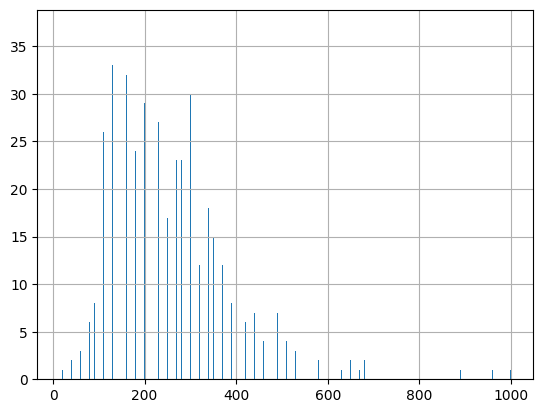

In [24]:
ground_water_df['HCO3'].hist(bins = 1000)

<Axes: >

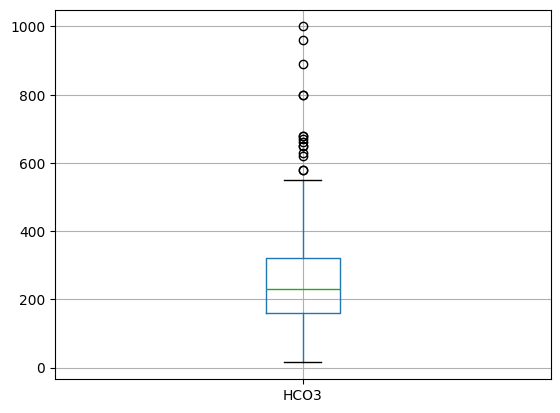

In [25]:
ground_water_df.boxplot(column=['HCO3'])

#### Chloride Present (Cl)

<Axes: >

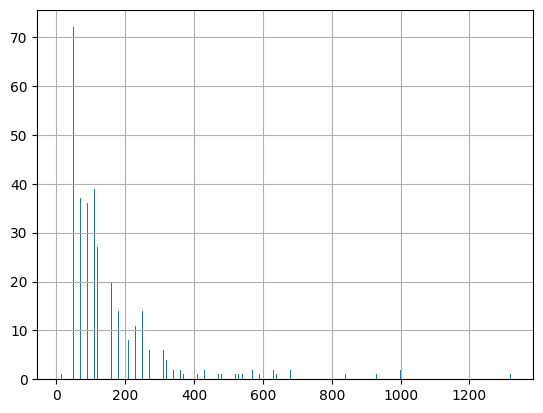

In [26]:
ground_water_df['Cl'].hist(bins = 1000)

<Axes: >

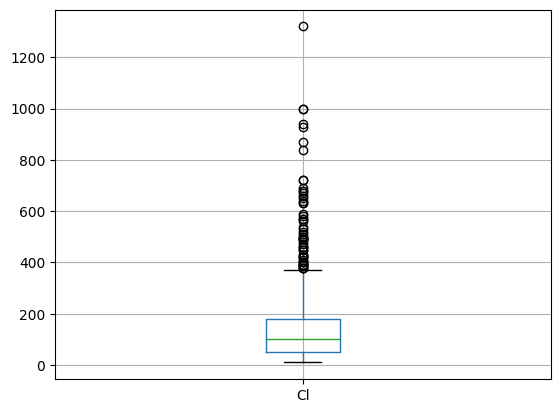

In [27]:
ground_water_df.boxplot(column=['Cl'])

#### Flouride Present (F)

<Axes: >

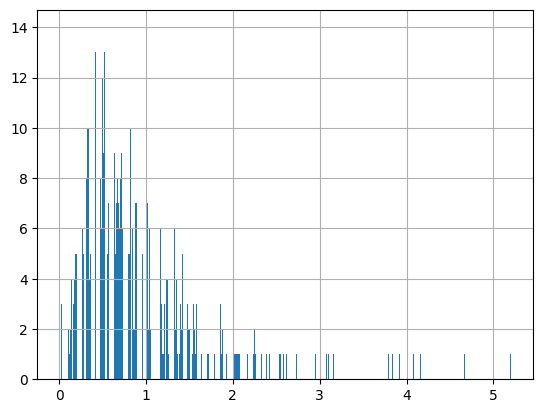

In [28]:
ground_water_df['F'].hist(bins = 1000)

<Axes: >

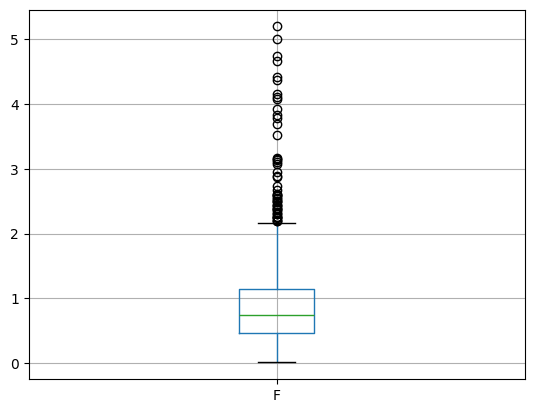

In [29]:
ground_water_df.boxplot(column=['F'])

#### Nitrate Present (NO3)

<Axes: >

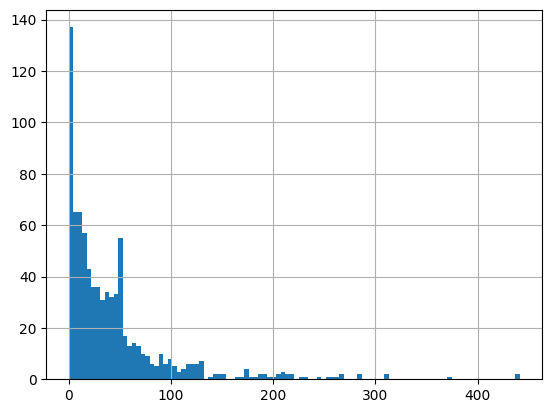

In [30]:
ground_water_df['NO3'].hist(bins = 100)

<Axes: >

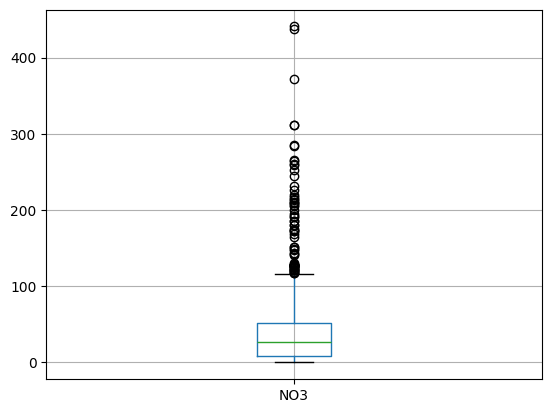

In [31]:
ground_water_df.boxplot(column=['NO3'])

#### Sulphate Present (SO4)

<Axes: >

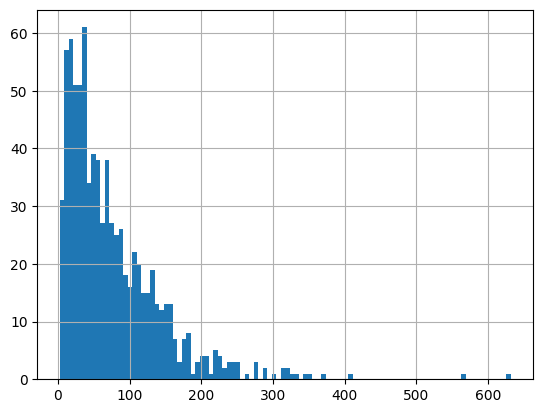

In [32]:
ground_water_df['SO4'].hist(bins = 100)

<Axes: >

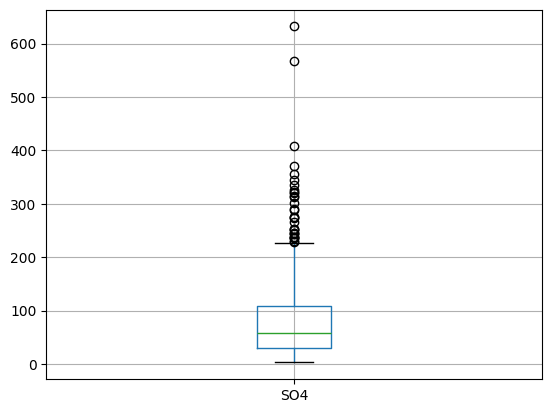

In [33]:
ground_water_df.boxplot(column=['SO4'])

#### Sodium Present (Na)

<Axes: >

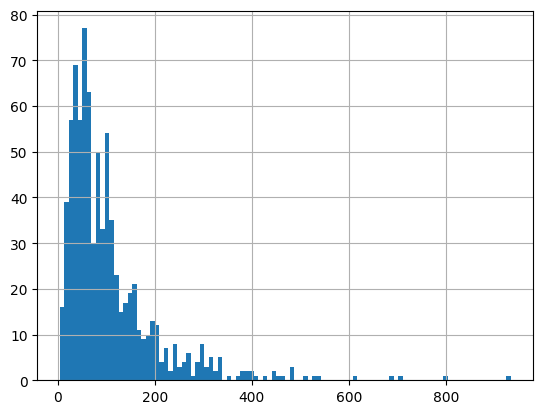

In [34]:
ground_water_df['Na'].hist(bins = 100)

<Axes: >

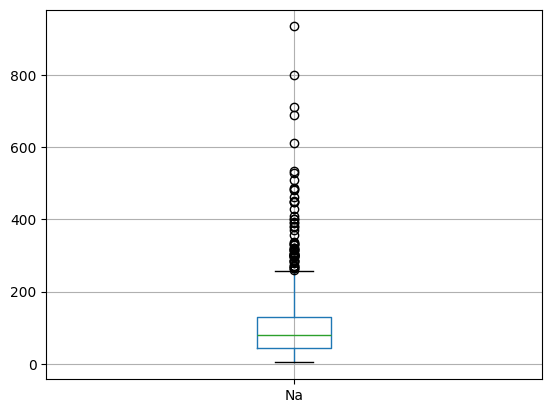

In [35]:
ground_water_df.boxplot(column=['Na'])

#### Potassium Present (K)

<Axes: >

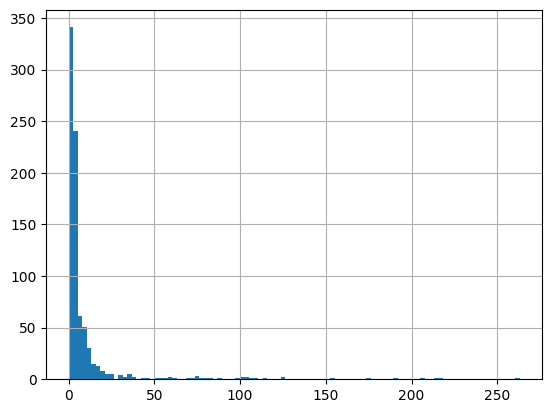

In [36]:
ground_water_df['K'].hist(bins = 100)

<Axes: >

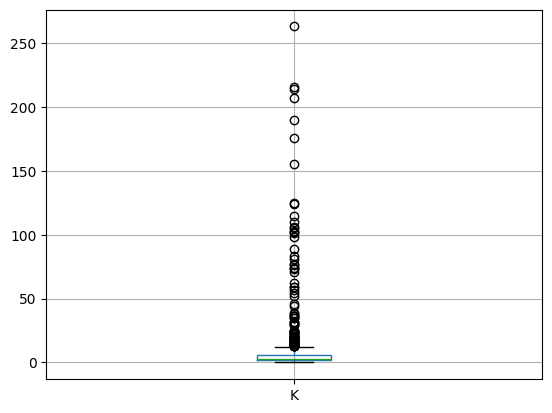

In [37]:
ground_water_df.boxplot(column=['K'])

#### Calcium Present (Ca)

<Axes: >

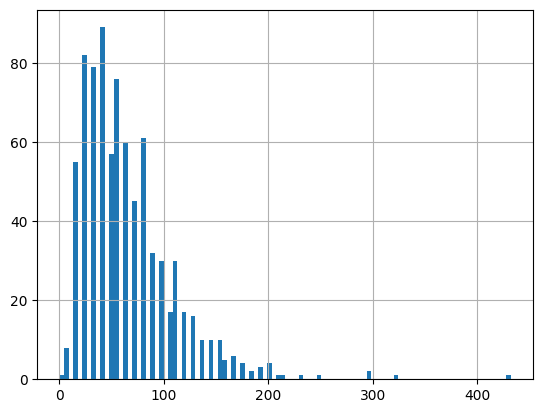

In [38]:
ground_water_df['Ca'].hist(bins = 100)

<Axes: >

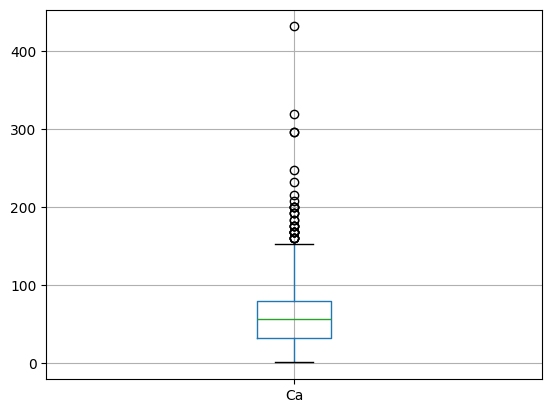

In [39]:
ground_water_df.boxplot(column=['Ca'])

#### Magnessium Present (Mg)

<Axes: >

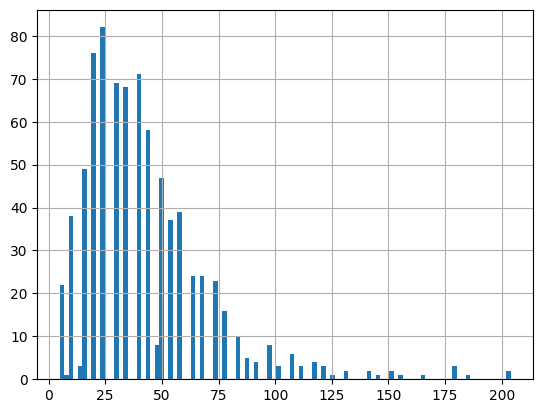

In [40]:
ground_water_df['Mg'].hist(bins = 100)

<Axes: >

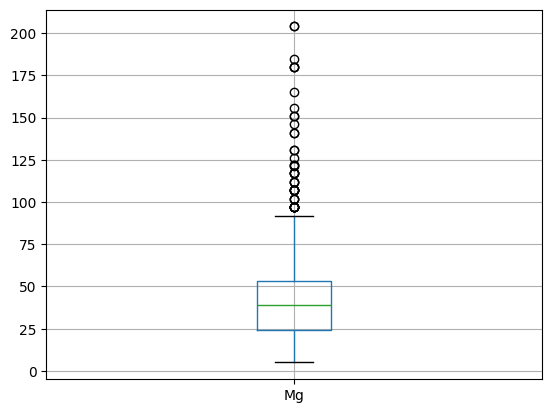

In [41]:
ground_water_df.boxplot(column=['Mg'])

#### Total Hardness (T.H)

<Axes: >

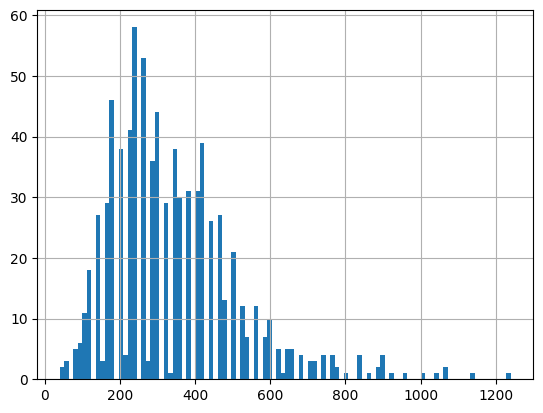

In [42]:
ground_water_df['T.H'].hist(bins = 100)

<Axes: >

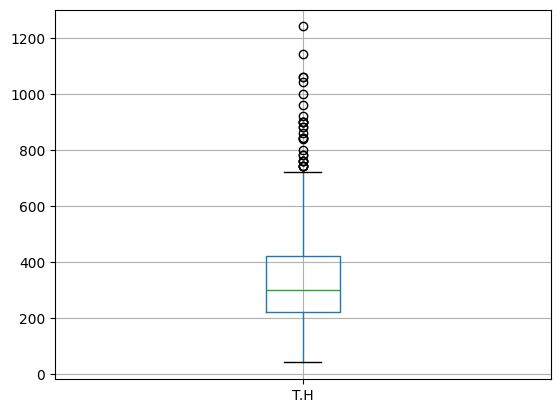

In [43]:
ground_water_df.boxplot(column=['T.H'])

#### Sodium Adsoption Ratio (SAR)

<Axes: >

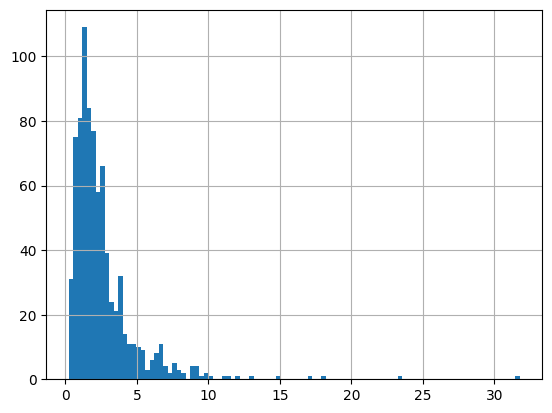

In [44]:
ground_water_df['SAR'].hist(bins = 100)

<Axes: >

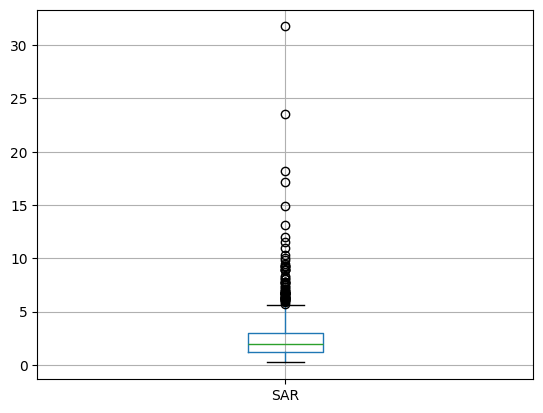

In [45]:
ground_water_df.boxplot(column=['SAR'])

#### Residual Sodium Carbonate (RSC)

<Axes: >

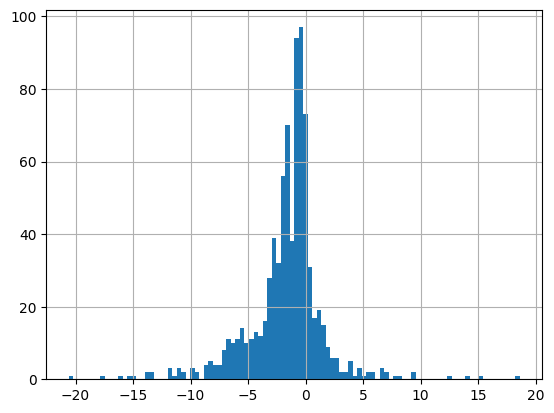

In [46]:
ground_water_df['RSC'].hist(bins = 100)

<Axes: >

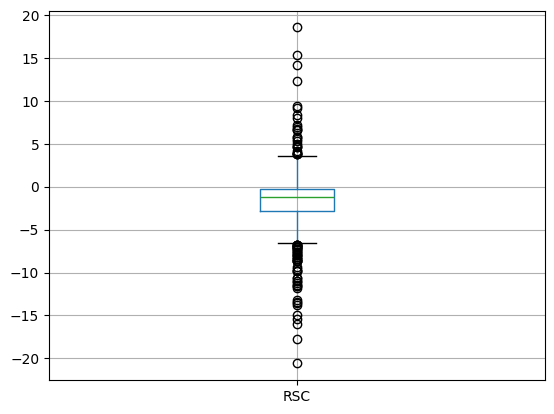

In [47]:
ground_water_df.boxplot(column=['RSC'])

#### Unnecessary Data

In [51]:
num_rows = len(ground_water_df)

for col in ground_water_df.columns:
    cnts = ground_water_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

#deleted the season column (it's now commented out)
# ground_water_df = ground_water_df.drop(columns=['season'])

In [49]:
ground_water_df[ground_water_df.duplicated()]

,sno,district,mandal,village,lat_gis,long_gis,RL_GIS,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC,Classification.1
